In [12]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b2/10/388c4a697275417a6974033e6ea7235d61e648e6c39d9cc06fcc6a6f71d4/dash-2.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import koreanize_matplotlib

okt = Okt()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df = pd.read_csv('csv/test.csv')

In [52]:
df

,c_date,keyword,ID,p_date,user,contents
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업..."
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업..."
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...
...,...,...,...,...,...,...
733,2024-02-29,빅데이터,799711781775527,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...
734,2024-02-29,빅데이터,730607098663031,2023-03-15,컴포트랩 Comfort Lab,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\..."
735,2024-02-29,빅데이터,757722275922119,2023-01-25,랜드북 - Landbook,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...
736,2024-02-29,빅데이터,696057065325275,2023-01-25,랜드북 - Landbook,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...


In [127]:
df['keyword'].unique()

array(['Java 취업', 'KDT', 'K디지털트레이닝', 'PM 취업', '개발자 취업', '데이터 취업', '부트캠프',
       '빅데이터'], dtype=object)

In [131]:
len(df['ID'])

738

In [130]:
len(df['ID'].unique())

545

In [53]:
import re

def remove_special_characters(text):
    # 이모티콘 및 특수문자 제거를 위한 정규표현식
    pattern = r'[^a-zA-Z0-9가-힣\s]'  # 영문, 한글, 숫자, 공백만 허용

    # 정규표현식을 사용하여 특수문자 제거
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# '내용' 열의 각 행에 대해 이모티콘과 특수문자 제거
df['contents_sentense'] = df['contents'].dropna().apply(remove_special_characters)

In [57]:
df[['contents','contents_sentense']]

,contents,contents_sentense
0,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...
1,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
2,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...
3,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
4,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...
...,...,...
733,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...
734,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...
735,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...
736,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...


## 전체 단어 빈도수

In [197]:
filtered_df = df[df['nouns'].str.contains('교육|과정|취업|국비|양성')]


In [198]:
filtered_df

,c_date,keyword,ID,p_date,user,contents,contents_sentense,nouns
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...,취업률 취업 유망 직종 전액 무료 매월 교육 수당 수 전액 국비 지원 교육 수당 매...
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...,백엔드 어디 취업 정답 개발 모든 분야 삼성 청년 아카데미 위탁 운영 사 멀티 캠퍼...
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...,취업 가능 항공 데이터 전문가 양성 과정 기 선착순 집중 교육 시작 데이터 기초 수...
...,...,...,...,...,...,...,...,...
729,2024-02-29,빅데이터,810554357389233,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
730,2024-02-29,빅데이터,929515768110369,2023-06-29,국제컴퓨터아카데미,❣️취업 시장 Hot한 과정 선착순 모집❣️\n국비지원 최대 100% 과정 OPEN...,취업 시장 Hot한 과정 선착순 모집\n국비지원 최대 100 과정 OPEN\n취업 ...,취업 시장 과정 선착순 모집 국비 지원 최대 과정 취업 준비 생 구직 재직 모두 국...
731,2024-02-29,빅데이터,304439468641216,2023-06-30,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
732,2024-02-29,빅데이터,818691729617059,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...


In [199]:
def extract_nouns(text):
    if text is not None and isinstance(text, str):
        nouns = okt.nouns(text)
        return nouns
    else:
        return []

def calculate_filtered_count(content_nouns):
    # content_nouns에서 길이가 2 이상인 명사들만 필터링
    filtered_nouns = [noun for noun in content_nouns if len(noun) >= 2]
    
    # 단어 빈도수 계산
    filtered_count = Counter(filtered_nouns)
    
    return filtered_count    


# '내용'열에서 명사 추출
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in filtered_df['contents_sentense']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]

# 단어 빈도수 계산
content_count = Counter(content_nouns)


# filtered_count 계산
filtered_count = calculate_filtered_count(content_nouns)
# 가장 빈도가 높은 상위 15개 명사 추출 

top_content_nouns = filtered_count.most_common(15)

# 가장 빈도가 높은 상위 100개 명사 추출 
top_filtered_nouns = filtered_count.most_common(100)

filtered_df['nouns'] = filtered_df['contents'].apply(extract_nouns)
filtered_df['nouns'] = filtered_df['nouns'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# 결과 출력
print(filtered_df['nouns'])

0      취업률 취업 유망 직종 전액 무료 매월 교육 수당 수 전액 국비 지원 교육 수당 매...
1      멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
2      백엔드 어디 취업 정답 개발 모든 분야 삼성 청년 아카데미 위탁 운영 사 멀티 캠퍼...
3      멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
4      취업 가능 항공 데이터 전문가 양성 과정 기 선착순 집중 교육 시작 데이터 기초 수...
                             ...                        
729    취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
730    취업 시장 과정 선착순 모집 국비 지원 최대 과정 취업 준비 생 구직 재직 모두 국...
731    취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
732    취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
733    취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
Name: nouns, Length: 567, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_33368\2424052947.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_33368\2424052947.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
top_filtered_nouns

[('취업', 1770),
 ('개발자', 610),
 ('교육', 565),
 ('스쿨', 524),
 ('지원', 502),
 ('데이터', 440),
 ('백엔드', 411),
 ('분석', 346),
 ('프로젝트', 287),
 ('준비', 282),
 ('국비', 266),
 ('부트캠프', 251),
 ('포트폴리오', 236),
 ('무료', 229),
 ('개발', 222),
 ('지금', 220),
 ('현직', 218),
 ('수강', 214),
 ('모집', 201),
 ('시작', 193),
 ('주도', 182),
 ('실무', 176),
 ('빅데이터', 175),
 ('과정', 173),
 ('기초', 171),
 ('강의', 168),
 ('커리큘럼', 168),
 ('전액', 150),
 ('신청', 146),
 ('확인', 146),
 ('마감', 145),
 ('훈련', 144),
 ('개월', 142),
 ('제로', 132),
 ('베이스', 129),
 ('심화', 124),
 ('테스트', 121),
 ('채용', 120),
 ('대기업', 119),
 ('가능', 118),
 ('전공자', 117),
 ('기업', 114),
 ('최대', 113),
 ('산업', 112),
 ('제공', 110),
 ('도전', 110),
 ('설계', 108),
 ('여러분', 108),
 ('혜택', 105),
 ('마케팅', 102),
 ('코딩', 100),
 ('전문가', 100),
 ('이해', 99),
 ('응용', 98),
 ('결정', 97),
 ('코드', 96),
 ('무엇', 95),
 ('지급', 95),
 ('면접', 95),
 ('온라인', 95),
 ('프론트엔드', 92),
 ('양성', 90),
 ('바로', 90),
 ('캠퍼스', 89),
 ('도메인', 88),
 ('모두', 88),
 ('누가', 87),
 ('본질', 87),
 ('수료', 86),
 ('캠프', 84),
 ('관련', 84

In [203]:
# 문장을 단어로 토큰화
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in content_nouns]

# Word2Vec 모델 훈련
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# 특정 키워드와 유사한 단어 찾기
similar_words = [(word, "{:.4f}".format(score)) for word, score in model.wv.most_similar('빅데이터', topn=10) if len(word) > 1]

# 결과 출력
print(f"Similar words: {similar_words}")

Similar words: [('즉시', '0.3565'), ('확실', '0.3325'), ('홍대', '0.3009'), ('토요일', '0.2985'), ('장안문', '0.2945'), ('상태', '0.2894'), ('정규', '0.2881'), ('협약', '0.2810'), ('가격', '0.2792'), ('정시', '0.2706')]


In [204]:
similar_words

[('즉시', '0.3565'),
 ('확실', '0.3325'),
 ('홍대', '0.3009'),
 ('토요일', '0.2985'),
 ('장안문', '0.2945'),
 ('상태', '0.2894'),
 ('정규', '0.2881'),
 ('협약', '0.2810'),
 ('가격', '0.2792'),
 ('정시', '0.2706')]

In [205]:
df_3 = pd.DataFrame(top_filtered_nouns, columns=['keyword', 'count'])

In [207]:
df_3.head(10)

,keyword,count
0,취업,1770
1,개발자,610
2,교육,565
3,스쿨,524
4,지원,502
5,데이터,440
6,백엔드,411
7,분석,346
8,프로젝트,287
9,준비,282


In [217]:
df_3.tail(10)

,keyword,count
90,수당,70
91,삼성,69
92,역량,69
93,컨설팅,66
94,국내,66
95,교수,65
96,커리어,64
97,기간,63
98,디지털,62
99,합격,62


# 상위 100개 단어 앞뒤문장 추출


In [208]:
top_filtered_nouns_only = [noun for noun, count in top_filtered_nouns]
print(top_filtered_nouns_only)

['취업', '개발자', '교육', '스쿨', '지원', '데이터', '백엔드', '분석', '프로젝트', '준비', '국비', '부트캠프', '포트폴리오', '무료', '개발', '지금', '현직', '수강', '모집', '시작', '주도', '실무', '빅데이터', '과정', '기초', '강의', '커리큘럼', '전액', '신청', '확인', '마감', '훈련', '개월', '제로', '베이스', '심화', '테스트', '채용', '대기업', '가능', '전공자', '기업', '최대', '산업', '제공', '도전', '설계', '여러분', '혜택', '마케팅', '코딩', '전문가', '이해', '응용', '결정', '코드', '무엇', '지급', '면접', '온라인', '프론트엔드', '양성', '바로', '캠퍼스', '도메인', '모두', '누가', '본질', '수료', '캠프', '관련', '매력', '사진', '교육비', '직무', '합리', '진행', '문의', '직접', '특강', '배움', '멀티', '학습', '서비스', '올인원', '누구', '기관', '방법', '상담', '취업률', '수당', '삼성', '역량', '컨설팅', '국내', '교수', '커리어', '기간', '디지털', '합격']


In [209]:
top_filtered_nouns_only

['취업',
 '개발자',
 '교육',
 '스쿨',
 '지원',
 '데이터',
 '백엔드',
 '분석',
 '프로젝트',
 '준비',
 '국비',
 '부트캠프',
 '포트폴리오',
 '무료',
 '개발',
 '지금',
 '현직',
 '수강',
 '모집',
 '시작',
 '주도',
 '실무',
 '빅데이터',
 '과정',
 '기초',
 '강의',
 '커리큘럼',
 '전액',
 '신청',
 '확인',
 '마감',
 '훈련',
 '개월',
 '제로',
 '베이스',
 '심화',
 '테스트',
 '채용',
 '대기업',
 '가능',
 '전공자',
 '기업',
 '최대',
 '산업',
 '제공',
 '도전',
 '설계',
 '여러분',
 '혜택',
 '마케팅',
 '코딩',
 '전문가',
 '이해',
 '응용',
 '결정',
 '코드',
 '무엇',
 '지급',
 '면접',
 '온라인',
 '프론트엔드',
 '양성',
 '바로',
 '캠퍼스',
 '도메인',
 '모두',
 '누가',
 '본질',
 '수료',
 '캠프',
 '관련',
 '매력',
 '사진',
 '교육비',
 '직무',
 '합리',
 '진행',
 '문의',
 '직접',
 '특강',
 '배움',
 '멀티',
 '학습',
 '서비스',
 '올인원',
 '누구',
 '기관',
 '방법',
 '상담',
 '취업률',
 '수당',
 '삼성',
 '역량',
 '컨설팅',
 '국내',
 '교수',
 '커리어',
 '기간',
 '디지털',
 '합격']

In [191]:
results = []

for noun in top_filtered_nouns_only:
    # Create a regular expression pattern to find the word with optional spaces before and after
    pattern = re.compile(r'\b\w*\s*{}\s*\w*\b'.format(re.escape(noun)))
    
    # Apply the pattern to the 'contents' column and find all matches
    matches = filtered_df['contents'].apply(lambda x: pattern.findall(str(x)))
    
    # Append the results to the list
    for index, match_list in enumerate(matches):
        if match_list:
            results.append({'Noun': noun, 'Context in row': index, 'Context': match_list})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('noun_context_results.csv', index=False)
    

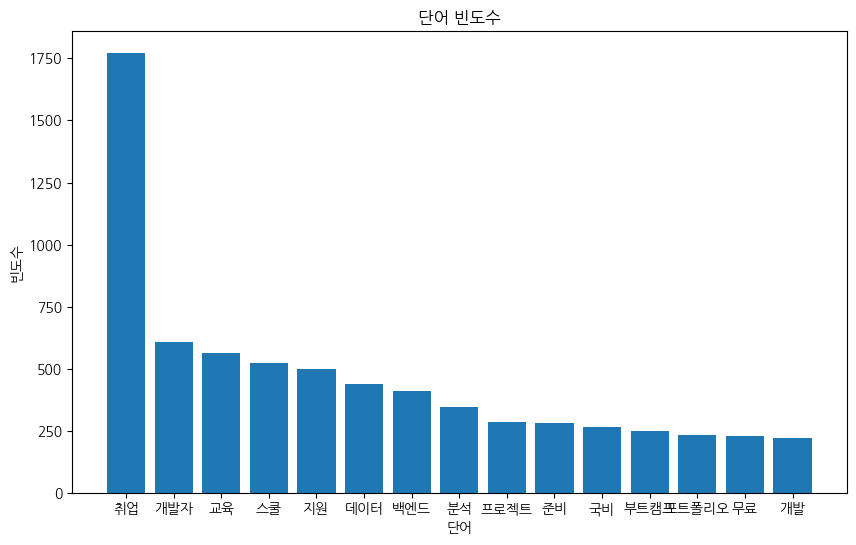

In [211]:
words, frequencies = zip(*top_content_nouns)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.title('단어 빈도수')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_33368\285904292.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_33368\285904292.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



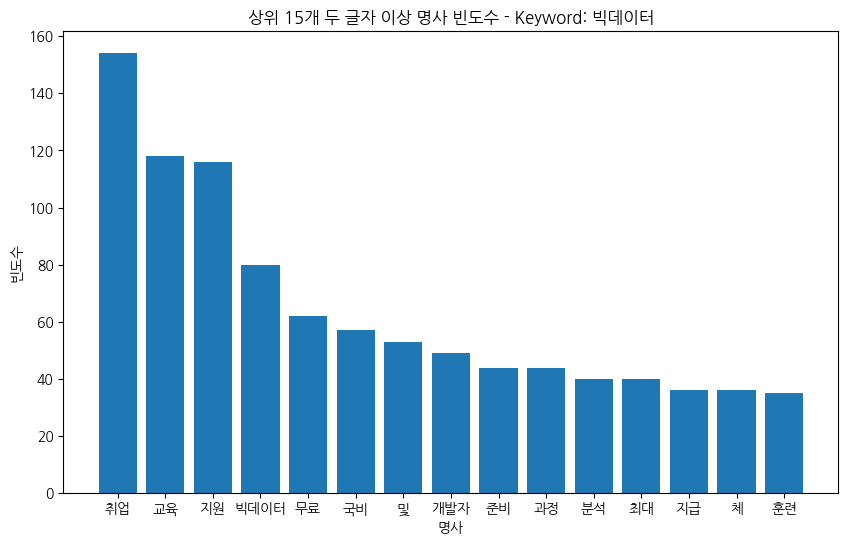

In [212]:
# 특정 키워드 값에 대한 데이터프레임 추출
specific_keyword = '빅데이터'
filtered_df_2 = filtered_df[filtered_df['keyword'] == specific_keyword]

# '내용'열에서 명사 추출
okt = Okt()
filtered_df_2['nouns'] = filtered_df_2['contents_sentense'].apply(extract_nouns)
filtered_df_2['nouns'] = filtered_df_2['nouns'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# 단어 빈도수 계산
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in filtered_df_2['contents_sentense']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]
content_count = Counter(content_nouns)

# filtered_count 계산
filtered_count = calculate_filtered_count(content_nouns)

# 가장 빈도가 높은 상위 15개 명사 추출 
top_content_nouns_2 = content_count.most_common(15)

# 가장 빈도가 높은 상위 15개 명사 추출 
top_filtered_nouns_2 = filtered_count.most_common(15)

# 빈도수를 기반으로 시각화
if top_filtered_nouns:
    words, frequencies = zip(*top_content_nouns_2)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(words)), frequencies, tick_label=words)
    plt.title(f'상위 15개 두 글자 이상 명사 빈도수 - Keyword: {specific_keyword}')
    plt.xlabel('명사')
    plt.ylabel('빈도수')
    plt.show()
else:
    print('No data to visualize.')

In [126]:
# 특정 키워드 값에 대한 데이터프레임 추출
specific_keyword = '개발자 교육'
filtered_df = df[df['keyword'] == specific_keyword]

# '내용'열에서 명사 추출
okt = Okt()
filtered_df['nouns'] = filtered_df['contents_sentense'].apply(extract_nouns)
filtered_df['nouns'] = filtered_df['nouns'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# 단어 빈도수 계산
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in filtered_df['contents_sentense']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]
content_count = Counter(content_nouns)

# filtered_count 계산
filtered_count = calculate_filtered_count(content_nouns)

# 가장 빈도가 높은 상위 15개 명사 추출 
top_content_nouns = content_count.most_common(15)

# 가장 빈도가 높은 상위 50개 명사 추출 
top_filtered_nouns = filtered_count.most_common(15)

# 빈도수를 기반으로 시각화
if top_filtered_nouns:
    words, frequencies = zip(*top_filtered_nouns)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(words)), frequencies, tick_label=words)
    plt.title(f'상위 50개 두 글자 이상 명사 빈도수 - Keyword: {specific_keyword}')
    plt.xlabel('명사')
    plt.ylabel('빈도수')
    plt.show()
else:
    print('No data to visualize.')

No data to visualize.


In [112]:
from sklearn.feature_extraction.text import CountVectorizer

# 'nouns' 열의 값들을 리스트로 가져오기
documents = df['nouns'].tolist()

# CountVectorizer를 사용하여 단어 빈도수 계산
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# DataFrame으로 변환
word_frequencies_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 'keyword' 열과 단어 빈도수 DataFrame을 합치기
result_df = pd.concat([df['keyword'], word_frequencies_df], axis=1)

# 각 키워드의 빈도수 합계 계산
keyword_total_frequencies = result_df.groupby('keyword').sum()

# 빈도수가 가장 높은 상위 20개 키워드 추출
top_keywords = keyword_total_frequencies.sum(axis=1).nlargest(20).index

# 결과 출력
print(keyword_total_frequencies.loc[top_keywords])

          가가  가격  가공  가구  가기  가끔  가능  가능성  가득  가로  ...  후천  훈려  훈련  훈련기  휴게실  \
keyword                                            ...                         
빅데이터       0   7   3   5   0   0  41    8   1   0  ...   2   0  32    0    0   
부트캠프       1   0   0   0   0   1  13    0   1   0  ...   0   0  27    0    0   
개발자 취업     0   0   0   0   1   0  36    2   0   0  ...   0   0  35    1    1   
데이터 취업     2   0   0   0   0   0  40    0   0   9  ...   0   0   9    0    0   
Java 취업    0   1   0   0   1   0   4    1   0   0  ...   0   0  12    0    0   
PM 취업      0   2   0   0   0   0   1    0   0   0  ...   0   0   0    0    0   
K디지털트레이닝   0   0   1   5   0   0   1    0   0   1  ...   0   1  15    0    0   
KDT        0   0   0   0   0   0   2    0   0   0  ...   0   0   7    1    0   

          휴무  휴학생  흐름  흥미  희망  
keyword                        
빅데이터       0    0   4   0  11  
부트캠프       0    1   0   2   2  
개발자 취업     0    5   0   0   8  
데이터 취업     0    3   0   0   4  
Java 취업

In [113]:
keyword_total_frequencies

,가가,가격,가공,가구,가기,가끔,가능,가능성,가득,가로,...,후천,훈려,훈련,훈련기,휴게실,휴무,휴학생,흐름,흥미,희망
keyword,,,,,,,,,,,,,,,,,,,,,
Java 취업,0,1,0,0,1,0,4,1,0,0,...,0,0,12,0,0,0,4,0,0,0
KDT,0,0,0,0,0,0,2,0,0,0,...,0,0,7,1,0,0,0,0,0,1
K디지털트레이닝,0,0,1,5,0,0,1,0,0,1,...,0,1,15,0,0,0,0,0,0,0
PM 취업,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
개발자 취업,0,0,0,0,1,0,36,2,0,0,...,0,0,35,1,1,0,5,0,0,8
데이터 취업,2,0,0,0,0,0,40,0,0,9,...,0,0,9,0,0,0,3,0,0,4
부트캠프,1,0,0,0,0,1,13,0,1,0,...,0,0,27,0,0,0,1,0,2,2
빅데이터,0,7,3,5,0,0,41,8,1,0,...,2,0,32,0,0,0,0,4,0,11


In [99]:
df

,c_date,keyword,ID,p_date,user,contents,contents_sentense,nouns
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...,취업률 취업 유망 직종 전액 무료 매월 교육 수당 수 전액 국비 지원 교육 수당 매...
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...,백엔드 어디 취업 정답 개발 모든 분야 삼성 청년 아카데미 위탁 운영 사 멀티 캠퍼...
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,멀티 채용 목적 교육 진행 우수 처 스타트업 기업 계로 취업 기회 제공 삼성 청년 ...
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...,취업 가능 항공 데이터 전문가 양성 과정 기 선착순 집중 교육 시작 데이터 기초 수...
...,...,...,...,...,...,...,...,...
733,2024-02-29,빅데이터,799711781775527,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,취업 고민 사람 모두 국비 지원 수업 교육비 최대 국비 지원 국제 컴퓨터 수강생 혜...
734,2024-02-29,빅데이터,730607098663031,2023-03-15,컴포트랩 Comfort Lab,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...,스포츠 브라 편견 앞 지퍼 브라 지지 강도 운동 해도 움직임 체형 별로 개 사이즈 걱정
735,2024-02-29,빅데이터,757722275922119,2023-01-25,랜드북 - Landbook,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...,랜드 북 토지 적정가격 확인 수익 분석 부동산 소유 가치 수익 부동산 매물 랜드 북...
736,2024-02-29,빅데이터,696057065325275,2023-01-25,랜드북 - Landbook,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...,부동산 소유 가치 수익 부동산 매물 랜드 북 토지 분석 매물 고민 중인 예비 투자자...


In [114]:
# 각 키워드의 빈도수 합계 계산
keyword_total_frequencies = df.groupby('keyword')['nouns'].apply(lambda x: ' '.join(x)).apply(lambda x: pd.Series(Counter(x.split()))).fillna(0)

# 빈도수가 가장 높은 상위 20개 키워드 추출
top_keywords = keyword_total_frequencies.sum(axis=1).nlargest(20).index

# 결과 출력
print(keyword_total_frequencies.loc[top_keywords])


           취업률     취업   유망   직종    전액     무료    매월     교육    수당      수  ...  \
keyword                                                                 ...   
빅데이터      21.0  150.0  3.0  1.0  16.0  149.0  15.0  115.0  21.0  135.0  ...   
부트캠프       7.0  358.0  0.0  0.0  46.0   44.0   3.0   97.0  10.0   88.0  ...   
개발자 취업    24.0  485.0  2.0  2.0  48.0   72.0  11.0  138.0  21.0   55.0  ...   
데이터 취업     9.0  429.0  1.0  0.0  18.0   25.0   3.0  102.0   8.0   48.0  ...   
Java 취업    2.0  167.0  1.0  1.0  15.0    9.0   5.0   28.0   3.0    2.0  ...   
PM 취업      0.0   46.0  1.0  0.0   0.0    5.0   0.0   13.0   0.0    9.0  ...   
K디지털트레이닝   2.0   12.0  0.0  0.0   5.0    3.0   1.0   15.0   3.0    2.0  ...   
KDT        4.0   13.0  0.0  0.0   2.0    5.0   1.0    4.0   4.0    2.0  ...   

           지지    북   토지  적정가격   소유   매물   건축   예시   로또    운  
keyword                                                      
빅데이터      1.0  5.0  3.0   1.0  2.0  4.0  4.0  2.0  1.0  1.0  
부트캠프      0.0  0.0  0.0

# 대쉬 시각화

In [91]:
# import plotly.express as px
# from dash import Dash, dcc, html

# import pandas as pd

# # 앱 초기화
# app = Dash(__name__)

# # 레이아웃 정의
# app.layout = html.Div([
#     html.H1("Top 10 Nouns Frequency"),
#     dcc.Graph(
#         id='bar-chart',
#         figure={
#             'data': [
#                 {'x': [word for word, _ in top_filtered_nouns], 'y': [freq for _, freq in top_filtered_nouns], 'type': 'bar', 'name': 'Frequency'},
#             ],
#             'layout': {
#                 'title': 'Top 10 Nouns Frequency',
#                 'xaxis': {'title': 'Nouns'},
#                 'yaxis': {'title': 'Frequency'}
#             }
#         }
#     )
# ])

# # 앱 실행
# if __name__ == '__main__':
#     app.run_server(debug=True)

## 워드클라우드


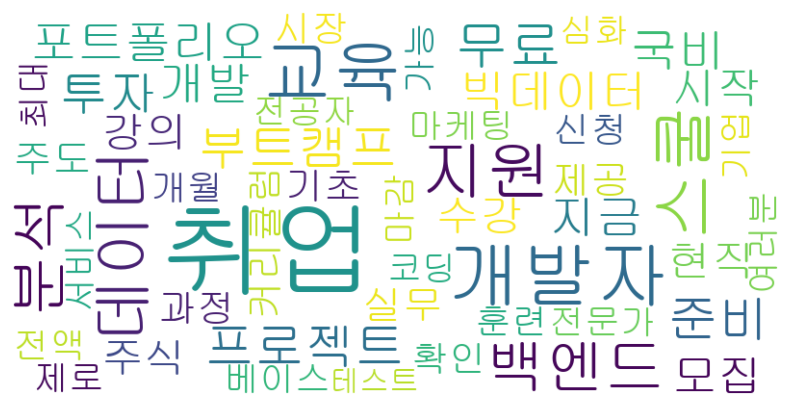

In [90]:
from wordcloud import WordCloud
font_path='C:/Windows/Fonts/NGULIM.ttf'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,  # 한글 폰트 경로 설정
).generate_from_frequencies(dict(top_filtered_nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
df

,c_date,keyword,ID,p_date,user,contents,contents_sentense,nouns
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...,"[취업률, 취업, 유망, 직종, 전액, 무료, 매월, 교육, 수당, 수, 전액, 국..."
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,"[멀티, 채용, 목적, 교육, 진행, 우수, 처, 스타트업, 기업, 계로, 취업, ..."
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...,"[백엔드, 어디, 취업, 정답, 개발, 모든, 분야, 삼성, 청년, 아카데미, 위탁..."
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,"[멀티, 채용, 목적, 교육, 진행, 우수, 처, 스타트업, 기업, 계로, 취업, ..."
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...,"[취업, 가능, 항공, 데이터, 전문가, 양성, 과정, 기, 선착순, 집중, 교육,..."
...,...,...,...,...,...,...,...,...
733,2024-02-29,빅데이터,799711781775527,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,"[취업, 고민, 사람, 모두, 국비, 지원, 수업, 교육비, 최대, 국비, 지원, ..."
734,2024-02-29,빅데이터,730607098663031,2023-03-15,컴포트랩 Comfort Lab,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...,"[스포츠, 브라, 편견, 앞, 지퍼, 브라, 지지, 강도, 운동, 해도, 움직임, ..."
735,2024-02-29,빅데이터,757722275922119,2023-01-25,랜드북 - Landbook,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...,"[랜드, 북, 토지, 적정가격, 확인, 수익, 분석, 부동산, 소유, 가치, 수익,..."
736,2024-02-29,빅데이터,696057065325275,2023-01-25,랜드북 - Landbook,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...,"[부동산, 소유, 가치, 수익, 부동산, 매물, 랜드, 북, 토지, 분석, 매물, ..."


## 상관관계 분석

In [215]:
cross_tab = pd.crosstab(filtered_df['keyword'], filtered_df['nouns'])

# 결과 출력
print(cross_tab)

nouns     가구 회사 취업 및 방 창업 대비 현장 실무 중심 교육 나 가구 만들기 최신 훈련 장비 초보자 비 전공자 수 현장 실무 체계 교육 가구 가공 조립 마감 가구 디자인 설계 가구 설계 제작 양성 과정 개월 국비 지원 매 월 훈련 수당 지급 고용노동부 인증 최우수 훈련 기관 베스트 직업 훈련 기관 선정 문의 홈페이지  \
keyword                                                                                                                                                                                    
Java 취업                                                   0                                                                                                                                
KDT                                                       0                                                                                                                                
K디지털트레이닝                                                  1                                                                                                                                
PM 취업                                                     0 

In [216]:
cross_tab


nouns,가구 회사 취업 및 방 창업 대비 현장 실무 중심 교육 나 가구 만들기 최신 훈련 장비 초보자 비 전공자 수 현장 실무 체계 교육 가구 가공 조립 마감 가구 디자인 설계 가구 설계 제작 양성 과정 개월 국비 지원 매 월 훈련 수당 지급 고용노동부 인증 최우수 훈련 기관 베스트 직업 훈련 기관 선정 문의 홈페이지,가장 취업 웹디자인 웹 퍼블리싱 과정 국비 지원 정부 원금 최대 무료 수강 항상 마감 자고 공부 해도 지원 유형 훈련 장려 금 최대 수,간의 개발 교육 노하우 취업 가능 국비 지원 무료 수강 가능 업계 성과 취업 지원 취업률 비 전공자 과정 전문성 클라우드 개발 블록 체인 개발 웹 개발 개발 비 전공자 막강 포트폴리오 개발자 양성 디 로켓,개발 디자인 데이터 직 관심 직 취업 스파르타 배움 캠프 전액 국비 지원 부담 내 공부 동안 늘 곁 현직 튜터 상주 취업 지원 채용 계 실무 팀 프로젝트 경험 공백기 이력서 개발 디자인 취업 코스 모집 중,개발자 교육 후 직무 고민 지금 인텔 인공 지능 인재 양성 과정 수료 생 프로젝트 능력 직무 맟춤형 코칭 통해 수,개발자 면접 볼 때 생각 역량 디자이너 협업 앱 개발 포트폴리오 보장 선택 시 맥북 지원 사 전문성 모두 튜터진 구성 기간 제한 취업 지원 결정 배움 캠프,개발자 연봉 탑 티어 풀 스택 개발자 프론트엔드 백엔드 클라우드 모두 개발자 취업 하이패스 전액 국비 지원 및 매달 지급 훈련 장려 금 부담 수강 가능 기초 진행 수업 선행 학습 인강 제공 비 전공자 수강 가능 협력 기업 취업 계 및 전문 취업 컨설턴트 배정,개발자 온라인 취업 설명 회 카라 쿠배 현직 개발자 슈퍼 코딩 신청 가능 참여 해도 아래 혜택 증정 카라 쿠 배급 현직 개발자 취업 자료 커리어 설계 카라 쿠배 현직 개발자 멘토링 최신 기출 기술 면접 제,개발자 전문가 양성 과정 국비 지원 무료 과정 취업 준비 생 구직 재직 모두 국비 지원 가능 국제 컴퓨터 아카데미 교육 생 혜택 교육비 무료 지원 교재 무료 지급 및 교육 장려 금 지급 예습 복습 온라인 강의 무료 지원 고용노동부 선정 취업률 우수 기관 노하우 취업 준비 생 위 포트폴리오 준비 전문 취업 팀 취업 지원 선착순 명 조기 마감 수 취업 대비 및 실무 스킬 업 교육 국비 지원 수업,개발자 중고 신입 재 취업 사수 동료 개발자 개발 환경 혼자 실무 한계 실력 향상 갈망 개발자 분 포트 위해 전액 후불 제 주 취업 코스 마련 개인 프로젝트 커리어 멘토링 재 취업 지원 코드 피드백 재 취업 성공 더 나은 개발 환경 연봉 상승 경험 수 항해 끝 지원,...,하이 미디어 개발자 과정 취업 후기 전액 무료 과정 훈련 원금 개발자 도전,한국 학생 여름방학 캠프 영국 과학 창의 예술 부트캠프 한국 학생 제로 주간 계속 영어 서바이벌 환경 문화 체험 최적화 표창 수여 영국 교육 이상 한국인 전문가 엄선 영국 과학 창의 예술 교육 전문가 콜라보 스마트 부모 아이 미래 방문 도시 런던 옥스포드 및 레지덴셜 캠프 등 대상 초등 학년 고등 학년 기간 등록 기간 정원 충족 시 조기 마감 정원 인원 명 프로그램 것 직접 섭외 전문가 과학 창의 예술 워크숍 영국 친구 필름메이킹 팀 프로젝트 영국 학생 방학 사립 보딩스쿨 영어 영국 문화 몰입 소수 정예 한국 학생 제로 표창 수여 등 의미 네이버 카페 네이버 블로그,현 직장 국내 유일 졸업생 전원 취업 데이터 직무 취업 데이터 취업 스쿨 제로 베이스 신청 끝 현직 대학 교수 기본 데이터 취업 전문가 교수 진 구성 취업 교육 누적 수강생 명 검증 전문성 지난 해 온 담임 교수 직접 취업 계 취업 바로 실무 프로젝트 지금 바로 상담 신청,혹시 국비 지원 알 국비 지원 개발자 취업 인터페이스 프론트엔드 데이터 분석 를 백엔드 개발자 여기 클라우드 더 분 무조건 추천 차별 를 개발자 역량 능력 개발자 기업 풀 스택 개발자 비 전공자 막강 포트폴리오 주 클라우드 개발자 양성 디 로켓,혹시 평생교육 바 처 대상자 가요 인프런 평생교육 바 처 유저 선택 커리어 플랫폼 개 이상 온라인 실무 강의 평생교육 바 처 프로그래밍 디자인 데이터 게임 개발 등 언제 어디 서나 온라인 학습 업 전문가 강의 모든 수강 평 공개 취업 이직 커리어 성장 취미 연 최대 원 원금 최신 직무 스킬 쭉 레벨 업 수 연속 공식 사용 처 선정 지난해 인프런 무려 명 이상 평생교육 바 처 도약 시작 평생교육 바 처 용법 보기 링크,혼자 집 공부 비대 웹 개발 부트캠프 경험 위해 번의 팀 프로젝트 국비 지원 유일 디자이너 협업 클론 코딩 주도 학습 취업 준비 단 개월 압축 스파르타 배움 캠프 도전,혼자 집 공부 온라인 무료 부트캠프 경험 위해 번의 팀 프로젝트 국비 지원 유일 디자이너 협업 클론 코딩 주도 학습 취업 준비 단 개월 압축 스파르타 배움 캠프 도전,혼자 취준생 라면 누구 취업 문 열 수 무제한 취업 지원 기술 면접 코테 등 대비 학습 알고리즘 자료구조 대표 교수 출신 검증 개발 실력 평가 시스템 기여 인 대기업 시나리오 구현 프로젝트 원 상당 추가 혜택 지금 바로 신청 취업 목표,화해 채용 대비 과제 포폴 바로 신입 취업 성공 무경 무 스펙 비 전공자 서비스 기획 프로젝트 신입 취업 수 취업 가장 방법 제로 베이스 취업 스쿨 지금 바로 신청,회계 생산 인사 물류 를 통해 산업 통합 스마트 사무 지원 실무 로서 실무 프로그램 능력 통합 사무 성장 회계 인사 생산 물류 통합 스마트 사무 국비 지원 매 월 훈련 수당 지급 고용노동부 인증 최우수 훈련 기관 베스트 직업 훈련 기관 선정 문의 홈페이지
keyword,,,,,,,,,,,,,,,,,,,,,
Java 취업,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KDT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
K디지털트레이닝,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PM 취업,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
개발자 취업,0,1,1,0,1,1,1,2,1,2,...,1,0,0,1,0,0,1,1,0,0
데이터 취업,0,0,0,2,1,0,0,0,0,0,...,0,0,6,1,1,0,0,0,0,0
부트캠프,0,0,0,2,0,1,0,0,0,0,...,0,1,2,0,0,1,1,0,0,0
빅데이터,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 카이제곱 검정

가설 설정:

귀무가설(H0): 'keyword'와 'nouns' 간에 독립성이 있다.


대립가설(H1): 'keyword'와 'nouns' 간에 독립성이 없다.

교차표 작성:

'keyword'를 행으로, 'contents'에서 추출한 단어를 열로 하는 교차표를 작성합니다.
카이제곱 검정 수행:

scipy.stats 모듈의 chi2_contingency 함수를 사용하여 교차표에 대한 카이제곱 검정을 수행합니다.
결과 해석:

유의수준(보통 0.05)을 기준으로 p-value를 확인하여 귀무가설을 기각할지 여부를 결정합니다.

In [213]:

from scipy.stats import chi2_contingency

# 교차표 작성
cross_table = pd.crosstab(filtered_df['keyword'], filtered_df['nouns'].apply(lambda x: ' '.join(x.split())))

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(cross_table)

# 결과 출력
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

Chi-squared: 2387.694943907818
P-value: 9.22529839184839e-33


카이제곱 검정의 결과는 p-value가 매우 작게 나타났습니다 (p-value: 4.83e-32). 이는 귀무가설을 기각하고 대립가설을 채택할 충분한 근거가 있다는 것을 의미 


'keyword'에 따라 'contents'의 분포가 다르다는 것을 의미

카이제곱 통계량이 매우 큰 경우, 두 변수 간에는 통계적으로 유의한 관계가 있을 가능성이 높습니다